In [69]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv(r'C:\Users\aangi\Desktop\data.csv')
df = df.drop(columns=['bedrooms'])
df = df.drop(columns=['bathrooms'])
df = df.drop(columns=['floors'])
df = df.drop(columns=['waterfront'])
df = df.drop(columns=['grade'])
df = df.drop(columns=['sqft_above'])
df = df.drop(columns=['yr_renovated'])
df = df.drop(columns=['lat'])
df = df.drop(columns=['long'])
df = df.drop(columns=['sqft_living15'])
df = df.drop(columns=['sqft_lot15'])
df = df.drop(columns=['view'])
df.head()

Unnamed: 0          id        date     price  sqft_living  sqft_lot  \
0           0  7129300520  2014-10-13  221900.0         1180      5650   
1           1  6414100192  2014-12-09  538000.0         2570      7242   
2           2  5631500400  2015-02-25  180000.0          770     10000   
3           3  2487200875  2014-12-09  604000.0         1960      5000   
4           4  1954400510  2015-02-18  510000.0         1680      8080   

   condition  sqft_basement  yr_built  zipcode  
0          3              0      1955    98178  
1          3            400      1951    98125  
2          3              0      1933    98028  
3          5            910      1965    98136  
4          3              0      1987    98074

In [4]:
df['date1'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')
df

Unnamed: 0          id        date     price  sqft_living  sqft_lot  \
0               0  7129300520  2014-10-13  221900.0         1180      5650   
1               1  6414100192  2014-12-09  538000.0         2570      7242   
2               2  5631500400  2015-02-25  180000.0          770     10000   
3               3  2487200875  2014-12-09  604000.0         1960      5000   
4               4  1954400510  2015-02-18  510000.0         1680      8080   
...           ...         ...         ...       ...          ...       ...   
21608       21608   263000018  2014-05-21  360000.0         1530      1131   
21609       21609  6600060120  2015-02-23  400000.0         2310      5813   
21610       21610  1523300141  2014-06-23  402101.0         1020      1350   
21611       21611   291310100  2015-01-16  400000.0         1600      2388   
21612       21612  1523300157  2014-10-15  325000.0         1020      1076   

       condition  sqft_basement  yr_built  zipcode      date1  
0              3              0      1955    98178 2014-10-13  
1              3            400      1951    98125 2014-12-09  
2              3              0      1933    98028 2015-02-25  
3              5            910      1965    98136 2014-12-09  
4              3              0      1987    98074 2015-02-18  
...          ...            ...       ...      ...        ...  
21608          3              0      2009    98103 2014-05-21  
21609          3              0      2014    98146 2015-02-23  
21610          3              0      2009    98144 2014-06-23  
21611          3              0      2004    98027 2015-01-16  
21612          3              0      2008    98144 2014-10-15  

[21613 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  object        
 3   price          21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   condition      21613 non-null  int64         
 7   sqft_basement  21613 non-null  int64         
 8   yr_built       21613 non-null  int64         
 9   zipcode        21613 non-null  int64         
 10  date1          21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 1.8+ MB


In [6]:
df = df.drop(columns=['date'])
df

Unnamed: 0          id     price  sqft_living  sqft_lot  condition  \
0               0  7129300520  221900.0         1180      5650          3   
1               1  6414100192  538000.0         2570      7242          3   
2               2  5631500400  180000.0          770     10000          3   
3               3  2487200875  604000.0         1960      5000          5   
4               4  1954400510  510000.0         1680      8080          3   
...           ...         ...       ...          ...       ...        ...   
21608       21608   263000018  360000.0         1530      1131          3   
21609       21609  6600060120  400000.0         2310      5813          3   
21610       21610  1523300141  402101.0         1020      1350          3   
21611       21611   291310100  400000.0         1600      2388          3   
21612       21612  1523300157  325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
3                910      1965    98136 2014-12-09  
4                  0      1987    98074 2015-02-18  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[21613 rows x 10 columns]

In [7]:
df.shape

(21613, 10)

In [8]:
df = df.drop_duplicates()
df.shape

(21613, 10)

In [9]:
df.isnull().mean() * 100

Unnamed: 0       0.0
id               0.0
price            0.0
sqft_living      0.0
sqft_lot         0.0
condition        0.0
sqft_basement    0.0
yr_built         0.0
zipcode          0.0
date1            0.0
dtype: float64

# обнаружение аномалий и избавление от них

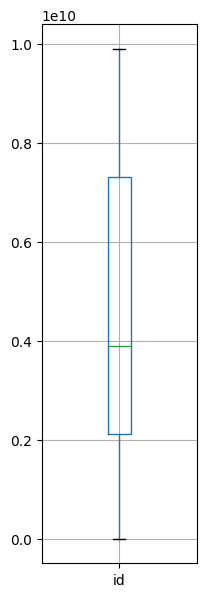

In [9]:
df.boxplot(column=['id'], figsize = (2, 7))
plt.show()

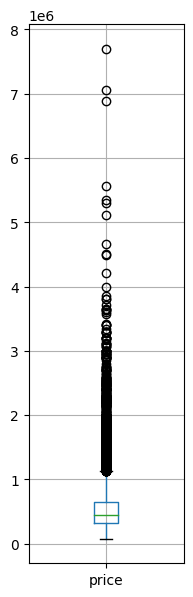

In [10]:
df.boxplot(column=['price'], figsize = (2, 7))
plt.show()

In [11]:
q = df['price'].quantile(0.99)
print(q)
df[df['price'] < q]

1964400.0000000051


Unnamed: 0          id     price  sqft_living  sqft_lot  condition  \
0               0  7129300520  221900.0         1180      5650          3   
1               1  6414100192  538000.0         2570      7242          3   
2               2  5631500400  180000.0          770     10000          3   
3               3  2487200875  604000.0         1960      5000          5   
4               4  1954400510  510000.0         1680      8080          3   
...           ...         ...       ...          ...       ...        ...   
21608       21608   263000018  360000.0         1530      1131          3   
21609       21609  6600060120  400000.0         2310      5813          3   
21610       21610  1523300141  402101.0         1020      1350          3   
21611       21611   291310100  400000.0         1600      2388          3   
21612       21612  1523300157  325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
3                910      1965    98136 2014-12-09  
4                  0      1987    98074 2015-02-18  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[21396 rows x 10 columns]

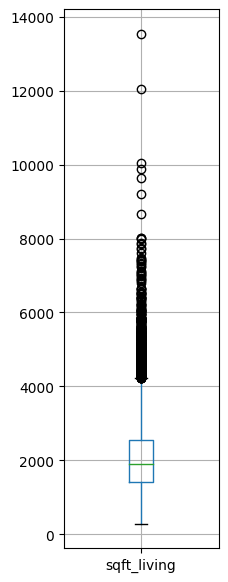

In [12]:
df.boxplot(column=['sqft_living'], figsize = (2, 7))
plt.show()

In [13]:
q = df['sqft_living'].quantile(0.99)
print(q)
df[df['sqft_living'] < q]

4978.80000000001


Unnamed: 0          id     price  sqft_living  sqft_lot  condition  \
0               0  7129300520  221900.0         1180      5650          3   
1               1  6414100192  538000.0         2570      7242          3   
2               2  5631500400  180000.0          770     10000          3   
3               3  2487200875  604000.0         1960      5000          5   
4               4  1954400510  510000.0         1680      8080          3   
...           ...         ...       ...          ...       ...        ...   
21608       21608   263000018  360000.0         1530      1131          3   
21609       21609  6600060120  400000.0         2310      5813          3   
21610       21610  1523300141  402101.0         1020      1350          3   
21611       21611   291310100  400000.0         1600      2388          3   
21612       21612  1523300157  325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
3                910      1965    98136 2014-12-09  
4                  0      1987    98074 2015-02-18  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[21396 rows x 10 columns]

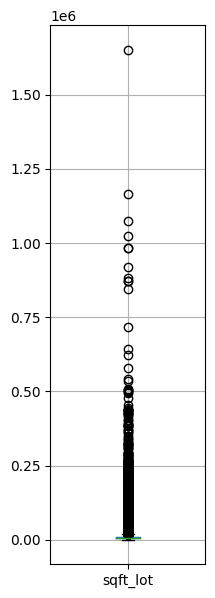

In [14]:
df.boxplot(column=['sqft_lot'], figsize = (2, 7))
plt.show()

In [15]:
q = df['sqft_lot'].quantile(0.99)
print(q)
df[df['sqft_lot'] < q]

213008.0


Unnamed: 0          id     price  sqft_living  sqft_lot  condition  \
0               0  7129300520  221900.0         1180      5650          3   
1               1  6414100192  538000.0         2570      7242          3   
2               2  5631500400  180000.0          770     10000          3   
3               3  2487200875  604000.0         1960      5000          5   
4               4  1954400510  510000.0         1680      8080          3   
...           ...         ...       ...          ...       ...        ...   
21608       21608   263000018  360000.0         1530      1131          3   
21609       21609  6600060120  400000.0         2310      5813          3   
21610       21610  1523300141  402101.0         1020      1350          3   
21611       21611   291310100  400000.0         1600      2388          3   
21612       21612  1523300157  325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
3                910      1965    98136 2014-12-09  
4                  0      1987    98074 2015-02-18  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[21395 rows x 10 columns]

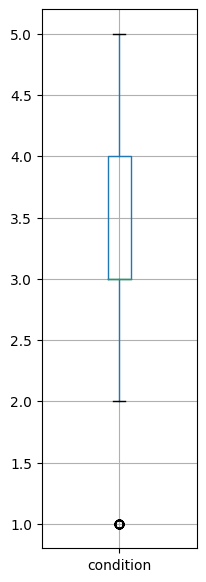

In [16]:
df.boxplot(column=['condition'], figsize = (2, 7))
plt.show()

In [17]:
q = df['condition'].quantile(0.99)
print(q)
df[df['condition'] < q]

5.0


Unnamed: 0          id      price  sqft_living  sqft_lot  condition  \
0               0  7129300520   221900.0         1180      5650          3   
1               1  6414100192   538000.0         2570      7242          3   
2               2  5631500400   180000.0          770     10000          3   
4               4  1954400510   510000.0         1680      8080          3   
5               5  7237550310  1225000.0         5420    101930          3   
...           ...         ...        ...          ...       ...        ...   
21608       21608   263000018   360000.0         1530      1131          3   
21609       21609  6600060120   400000.0         2310      5813          3   
21610       21610  1523300141   402101.0         1020      1350          3   
21611       21611   291310100   400000.0         1600      2388          3   
21612       21612  1523300157   325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
4                  0      1987    98074 2015-02-18  
5               1530      2001    98053 2014-05-12  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[19912 rows x 10 columns]

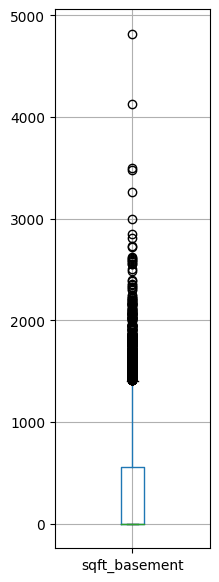

In [18]:
df.boxplot(column=['sqft_basement'], figsize = (2, 7))
plt.show()

In [19]:
q = df['sqft_basement'].quantile(0.99)
print(q)
df[df['sqft_basement'] < q]

1660.0


Unnamed: 0          id     price  sqft_living  sqft_lot  condition  \
0               0  7129300520  221900.0         1180      5650          3   
1               1  6414100192  538000.0         2570      7242          3   
2               2  5631500400  180000.0          770     10000          3   
3               3  2487200875  604000.0         1960      5000          5   
4               4  1954400510  510000.0         1680      8080          3   
...           ...         ...       ...          ...       ...        ...   
21608       21608   263000018  360000.0         1530      1131          3   
21609       21609  6600060120  400000.0         2310      5813          3   
21610       21610  1523300141  402101.0         1020      1350          3   
21611       21611   291310100  400000.0         1600      2388          3   
21612       21612  1523300157  325000.0         1020      1076          3   

       sqft_basement  yr_built  zipcode      date1  
0                  0      1955    98178 2014-10-13  
1                400      1951    98125 2014-12-09  
2                  0      1933    98028 2015-02-25  
3                910      1965    98136 2014-12-09  
4                  0      1987    98074 2015-02-18  
...              ...       ...      ...        ...  
21608              0      2009    98103 2014-05-21  
21609              0      2014    98146 2015-02-23  
21610              0      2009    98144 2014-06-23  
21611              0      2004    98027 2015-01-16  
21612              0      2008    98144 2014-10-15  

[21392 rows x 10 columns]

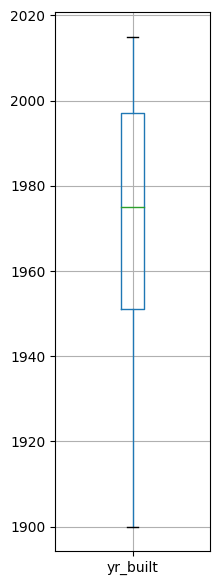

In [20]:
df.boxplot(column=['yr_built'], figsize = (2, 7))
plt.show()

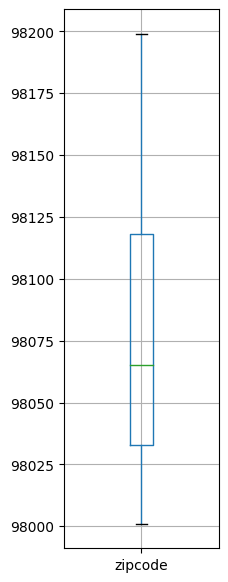

In [21]:
df.boxplot(column=['zipcode'], figsize = (2, 7))
plt.show()

In [22]:
from pandas_profiling import ProfileReport

In [23]:
df = pd.read_csv(r'C:\Users\aangi\Desktop\data.csv')
df = df.drop(columns=['bedrooms'])
df = df.drop(columns=['bathrooms'])
df = df.drop(columns=['floors'])
df = df.drop(columns=['waterfront'])
df = df.drop(columns=['grade'])
df = df.drop(columns=['sqft_above'])
df = df.drop(columns=['yr_renovated'])
df = df.drop(columns=['lat'])
df = df.drop(columns=['long'])
df = df.drop(columns=['sqft_living15'])
df = df.drop(columns=['sqft_lot15'])
df = df.drop(columns=['view'])
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# важность признаков

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
X = df[['Unnamed: 0', 'id', 'price', 'sqft_living', 'sqft_lot', 'condition', 'sqft_basement', 'yr_built', 'zipcode']]
y = df.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))

           Specs         Score
1             id  2.310726e+12
2          price  2.197214e+09
4       sqft_lot  3.528879e+08
3    sqft_living  1.653340e+06
6  sqft_basement  1.251227e+06
0     Unnamed: 0  1.114921e+06
7       yr_built  2.664461e+03
8        zipcode  6.308307e+02
5      condition  1.741292e+02


# стандартизация

In [29]:
features = ['id', 'Unnamed: 0', 'sqft_living', 'sqft_lot', 'condition', 'sqft_basement', 'yr_built', 'zipcode']
x = df.loc[:, features].values
y = df.loc[:,['price']].values

In [35]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

id  Unnamed: 0  sqft_living  sqft_lot  condition  sqft_basement  \
0  0.886146   -1.731971    -0.979835 -0.228321  -0.629187      -0.658681   
1  0.637511   -1.731810     0.533634 -0.189885  -0.629187       0.245141   
2  0.365444   -1.731650    -1.426254 -0.123298  -0.629187      -0.658681   
3 -0.727656   -1.731490    -0.130550 -0.244014   2.444294       1.397515   
4 -0.912881   -1.731330    -0.435422 -0.169653  -0.629187      -0.658681   

   yr_built   zipcode  
0 -0.544898  1.870152  
1 -0.681079  0.879568  
2 -1.293892 -0.933388  
3 -0.204446  1.085160  
4  0.544548 -0.073636

# анализ главных компонент

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
principalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -1.843354              -0.887942              -0.268158   
1              -0.751440               0.549877              -0.401924   
2              -1.274360              -0.864874               0.950938   
3              -1.885654               2.228530               0.398380   
4              -0.048299              -0.624970               1.146017   

   principal component 4  principal component 5  principal component 6  \
0              -0.402648               2.074784               0.517443   
1              -0.596480               1.942299               0.074237   
2              -1.606514               0.960186              -0.205764   
3              -0.378512               0.053835              -0.909501   
4              -0.437383               1.382479              -1.098202   

   principal component 7  principal component 8  
0               0.639717               0.138409  
1               0.140183              -0.487690  
2              -1.310554              -0.132858  
3               1.385062               1.085640  
4               0.315427               0.257978

# нормализация

In [42]:
from sklearn import preprocessing

df = pd.read_csv(r'C:\Users\aangi\Desktop\data.csv')
df = df.drop(columns=['bedrooms'])
df = df.drop(columns=['bathrooms'])
df = df.drop(columns=['floors'])
df = df.drop(columns=['waterfront'])
df = df.drop(columns=['grade'])
df = df.drop(columns=['sqft_above'])
df = df.drop(columns=['yr_renovated'])
df = df.drop(columns=['lat'])
df = df.drop(columns=['long'])
df = df.drop(columns=['sqft_living15'])
df = df.drop(columns=['sqft_lot15'])
df = df.drop(columns=['view'])

features = ['id', 'Unnamed: 0', 'sqft_living', 'sqft_lot', 'condition', 'sqft_basement', 'yr_built', 'zipcode']
x = df.loc[:, features].values

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

0         1         2         3    4         5         6         7
0  0.720103  0.000000  0.067170  0.003108  0.5  0.000000  0.478261  0.893939
1  0.647853  0.000046  0.172075  0.004072  0.5  0.082988  0.443478  0.626263
2  0.568795  0.000093  0.036226  0.005743  0.5  0.000000  0.286957  0.136364
3  0.251157  0.000139  0.126038  0.002714  1.0  0.188797  0.565217  0.681818
4  0.197333  0.000185  0.104906  0.004579  0.5  0.000000  0.756522  0.368687

# локоть 

In [45]:
from sklearn.cluster import KMeans

In [77]:
dataset = pd.read_csv(r'C:\Users\aangi\Desktop\data.csv')
dataset = dataset.drop(columns=['bedrooms'])
dataset = dataset.drop(columns=['bathrooms'])
dataset = dataset.drop(columns=['floors'])
dataset = dataset.drop(columns=['waterfront'])
dataset = dataset.drop(columns=['grade'])
dataset = dataset.drop(columns=['sqft_above'])
dataset = dataset.drop(columns=['yr_renovated'])
dataset = dataset.drop(columns=['lat'])
dataset = dataset.drop(columns=['long'])
dataset = dataset.drop(columns=['sqft_living15'])
dataset = dataset.drop(columns=['sqft_lot15'])
dataset = dataset.drop(columns=['view'])
X = dataset.iloc[:, [3, 4]].values

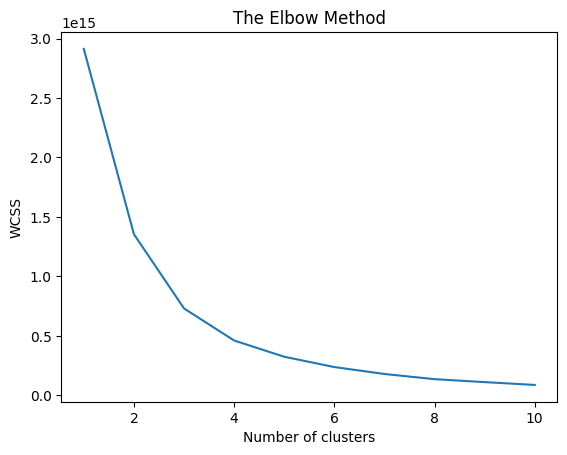

In [78]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
print(wcss)

[2912934992371221.5, 1354695614662165.8, 730367154475738.2, 460780508702109.2, 324191435625436.5, 237501556846807.5, 179125189778185.6, 135777662688209.4, 110887737440118.84, 87247691407295.33]


In [80]:
for i in range(1, 10):
    cl = wcss[i] / wcss[i - 1]
    print(cl)

0.46506208281682265
0.5391374612649628
0.6308888699038775
0.70357020208731
0.7325966412055729
0.7542063814500566
0.758004292173232
0.8166861562107893
0.7868109984154964


In [81]:
clus = [0.46506208281682265, 0.5391374612649628, 0.6308888699038775, 0.7035702020873098, 0.732596641205573, 0.7542063814500568, 0.7580042921732321, 0.8166861562107892, 0.7868109984154964] 
clus.append(cl)
max_i = 0
cul = 0
for i in range(1, 9):
    max_ii = clus[i] - clus[i - 1]
    if max_ii > max_i:
        max_i = max_ii
        cul = clus[i]
print(cul)
print(clus.index(cul) + 1)

0.6308888699038775
3


In [60]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

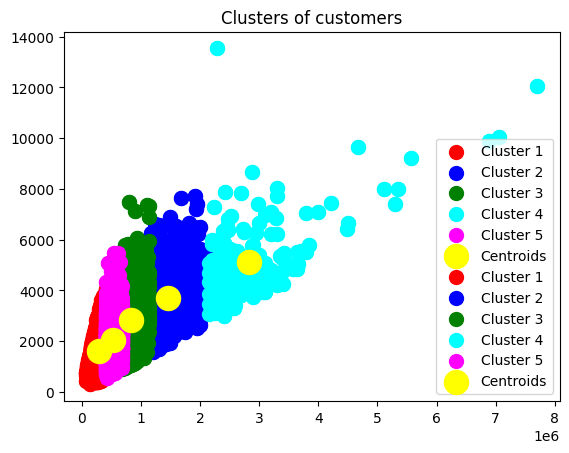

In [62]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# иерархическая кластеризация

In [82]:
X = dataset.iloc[:, [3, 4]].values

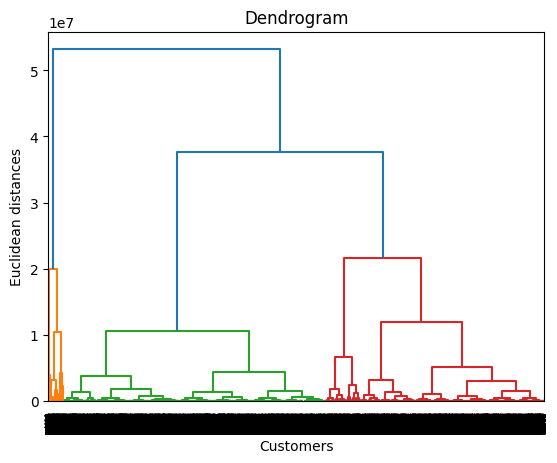

In [83]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [84]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

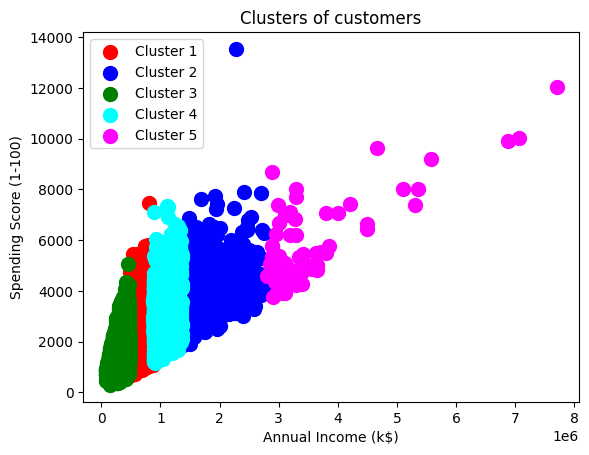

In [86]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [74]:
clusters = dataset.iloc[:,6].values
print(clusters)

[3 3 3 ... 3 3 3]


In [87]:
from sklearn import metrics

metrics.rand_score(clusters, y_hc)

0.5012764971116815